In [1]:
#Import statements

#General packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as  np

#Classifier packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#Packages for the creation of the tree image
import os
import pydot
from sklearn.tree import export_graphviz
from IPython.display import Image

#Hyperparameter tuning packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Confusion matrix visual element package
from sklearn.metrics import plot_confusion_matrix

In [2]:
#Data import
studentmerge = pd.read_csv("Data/student-merge-clean.csv")

#Encoding of the categorical attributes
studentmerge_encoded = pd.get_dummies(studentmerge)

In [3]:
#Separating X and y labels
y = studentmerge_encoded["Walc"]
X = studentmerge_encoded.drop(["Walc"],axis=1)

In [70]:
#Extracting the lists with attribute names and class labels
feature_names = [atts for atts in X]
class_names = ["1","2","3","4","5"]

#Splitting in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=45)

#Classifier with tuned hyperparameters
clf = RandomForestClassifier(n_estimators = 1983, min_samples_split= 2, min_samples_leaf= 1, max_features = 6, max_depth = None,
bootstrap = True)

#Fitting of the model on the data
clf.fit(X_train, y_train)

#Printing the score of the model
print(clf.score(X_test, y_test))

#Export as dot file and showing it as an image (with a random tree in range of 1983)
estimator = clf.estimators_[49]

export_graphviz(estimator, out_file='tree.dot', 

                feature_names = feature_names,

                class_names = class_names,
                
                rounded = True, proportion = False, 

                precision = 200, filled = True)

(graph,) = pydot.graph_from_dot_file('tree.dot')

graph.write_png('tree.png')

Image(filename = 'tree.png')

0.7990430622009569


In [71]:
#Loop that prints the actual label, the predicted label and a "correct" statement if actual == predict

correct = 0

for i in range(len(X_test)):
    a = clf.predict([X_test.iloc[i]])
    msg = ""
    if y_test.values[i] == a[0]:
        msg = "=====CORRECT====="
        correct += 1
    print("Actual={}  --  Predict={} -- {}".format(y_test.values[i],a, msg))
        
print(correct/len(X_test))

Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=3  --  Predict=[3] -- =====CORRECT=====
Actual=4  --  Predict=[1] -- 
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=3  --  Predict=[3] -- =====CORRECT=====
Actual=4  --  Predict=[1] -- 
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=2  --  Predict=[2] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=2  --  Predict=[2] -- =====CORRECT=====
Actual=3  --  Predict=[3] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=2  --  Predict=[2] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====


Actual=3  --  Predict=[3] -- =====CORRECT=====
Actual=2  --  Predict=[3] -- 
Actual=4  --  Predict=[4] -- =====CORRECT=====
Actual=4  --  Predict=[3] -- 
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=5  --  Predict=[4] -- 
Actual=3  --  Predict=[3] -- =====CORRECT=====
Actual=3  --  Predict=[3] -- =====CORRECT=====
Actual=2  --  Predict=[1] -- 
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=4  --  Predict=[4] -- =====CORRECT=====
Actual=5  --  Predict=[5] -- =====CORRECT=====
Actual=3  --  Predict=[3] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
Actual=1  --  Predict=[2] -- 
Actual=4  --  Predict=[4] -- =====CORRECT=====
Actual=1  --  Predict=[1] -- =====CORRECT=====
0.7990430622009569


In [32]:
#Creating a range of parameters to randomly get an idea of possibly good parameters

#Number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 50)]

#Number of features to consider at every subspace
max_features = range(1,51)

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Method of data selection
bootstrap = [True, False]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [40]:
#Use the random grid to search for an estimate of good hyperparameters
#Random search of parameters, using 3 fold cross validation, 
#There will be searched in 100 random iterations
#using 14 out of 16 CPU cores available (Desktop) | not all are used to avoid stress/high temperatures for longer run times
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = 14)

#Fit the random search model
clf_random.fit(X_train, y_train)

#Retrieve the best parameter combination
clf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:    3.9s
[Parallel(n_jobs=14)]: Done 134 tasks      | elapsed:   38.1s
[Parallel(n_jobs=14)]: Done 300 out of 300 | elapsed:  1.5min finished


{'n_estimators': 1897,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 7,
 'bootstrap': False}

In [48]:
#Creating a range of parameters to get optimal parameters by bruteforcing

#The parameter ranges are adjusted based on the above results (during randomsearchCV)

# Number of trees in random forest
n_estimators = list(range(1800, 2000))
# Number of features to consider at every split
max_features = range(5,15)
# Maximum number of levels in tree
#max_depth = ["None"] --> default
# Minimum number of samples required to split a node
min_samples_split = [2]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
bootstrap = [True, False]

#Create the optimal grid
optimal_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#Optimal search of parameters, using 3 fold cross validation, 
#All possible combinations will be tried
#using 14 out of 16 CPU cores available (Desktop) | not all are used to avoid stress/high temperatures for longer run times
grid_search = GridSearchCV(estimator = clf, param_grid = optimal_grid, cv = 3, n_jobs = 14, verbose = 2)
grid_search.fit(X_train, y_train)

#Retrieve the best parameter combination
grid_search.best_params_

Fitting 3 folds for each of 4000 candidates, totalling 12000 fits


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:    4.9s
[Parallel(n_jobs=14)]: Done 134 tasks      | elapsed:   32.8s
[Parallel(n_jobs=14)]: Done 337 tasks      | elapsed:  1.4min
[Parallel(n_jobs=14)]: Done 620 tasks      | elapsed:  2.5min
[Parallel(n_jobs=14)]: Done 985 tasks      | elapsed:  3.9min
[Parallel(n_jobs=14)]: Done 1430 tasks      | elapsed:  5.6min
[Parallel(n_jobs=14)]: Done 1957 tasks      | elapsed:  7.8min
[Parallel(n_jobs=14)]: Done 2564 tasks      | elapsed: 10.4min
[Parallel(n_jobs=14)]: Done 3253 tasks      | elapsed: 13.3min
[Parallel(n_jobs=14)]: Done 4022 tasks      | elapsed: 16.8min
[Parallel(n_jobs=14)]: Done 4873 tasks      | elapsed: 20.7min
[Parallel(n_jobs=14)]: Done 5804 tasks      | elapsed: 25.2min
[Parallel(n_jobs=14)]: Done 6817 tasks      | elapsed: 30.1min
[Parallel(n_jobs=14)]: Done 7910 tasks      | elapsed: 35.4min
[Parallel(n_jobs=14)]: Done 9085 tasks      | 

{'bootstrap': True,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1983}

Iteration with tuned parameters
and all attributes included.
Accuracy = 0.7990430622009569


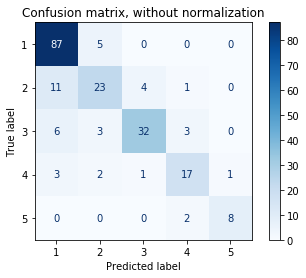

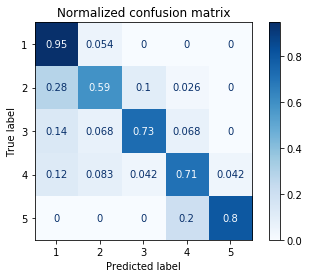

In [72]:
#Printing the iteration (see report)
np.set_printoptions(precision=2)
print("Iteration with tuned parameters")
print("and all attributes included.")
print("Accuracy = " + str(clf.score(X_test, y_test)))

#Plot non-normalized and normalized confusion matrix of the results of the model
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

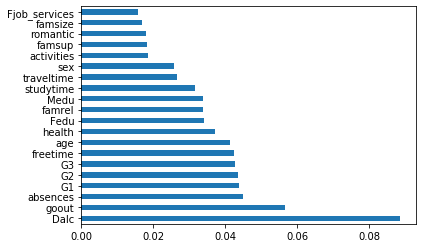

In [73]:
#A graph to visually inspect the most impactful attributes in the model
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
newperson = []

for i in range(46):
    print("feature '{}' (possible values: {})".format(feature_names[i], X[feature_names[i]].unique()))
    try:
        inp = int(input())
    except:
        print("There was a mistake")
        inp = 0
    newperson.append(inp)


print("You belong to class {}".format(clf.predict([newperson])[0]))